In [11]:
#to correct the tensorflow issues
import tensorflow_self_check

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
#tensorflow is the best library and an open source avaiable for deep learning.
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',  start='2012-01-01', end='2019-12-17')
#Show the data
df.tail(60)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-24,55.622501,54.297501,55.257500,54.419998,124763200.0,53.885353
2019-09-25,55.375000,54.285000,54.637501,55.257500,87613600.0,54.714626
2019-09-26,55.235001,54.707500,55.000000,54.972500,75334000.0,54.432430
2019-09-27,55.240002,54.320000,55.134998,54.705002,101408000.0,54.167561
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800.0,56.194942


In [3]:
#Get the number of rows and columns in the data set
df.shape

(2003, 6)

C:\Users\PRASANNA BHARANI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


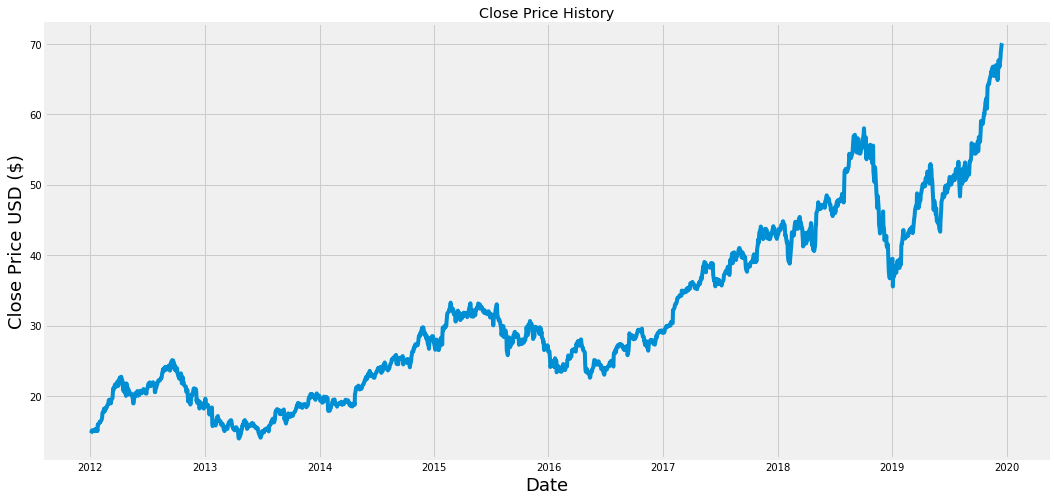

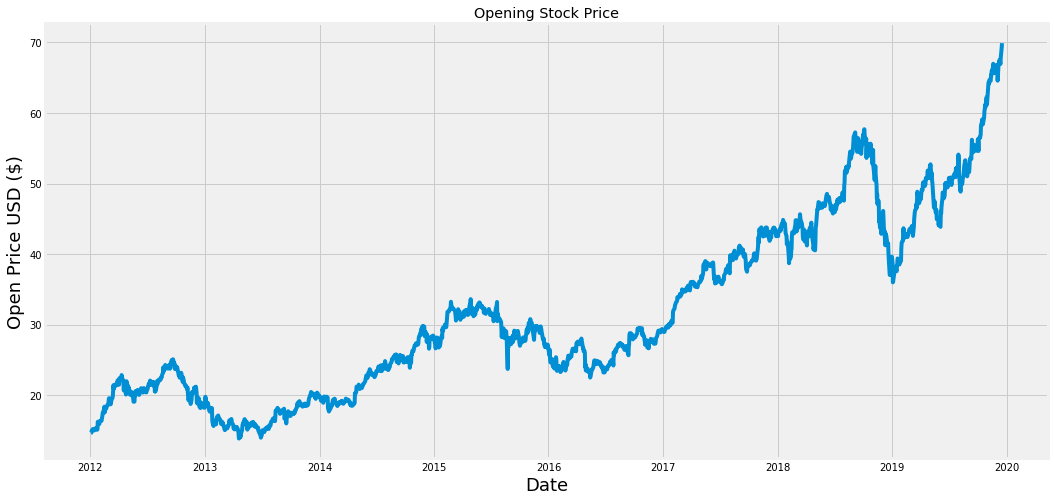

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])

plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Opening Stock Price')
plt.plot(df['Open']) 

plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
work_data=len(dataset)
training_data_len = math.ceil( len(dataset) * .8 )

type(training_data_len)

int

In [6]:
#Scale the data
#scaling done by (x-min)/range
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [7]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

print(len(train_data))

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 62:
    print(x_train)
    print(y_train)
    print()
    


1603
[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172,

In [8]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:

#A LSTM network expects the input to be 3-Dimensional in the form [samples, time steps, features]:
# samples is the number of data points (or rows/ records) we have, 
# time steps is the number of time-dependent steps that are there in a single data point (60),
# features/indicators refers to the number of variables we have for the corresponding true value in Y, since we are only using one feature 'Close',
# the number of features/indicators will be one
#Reshape the data into the shape accepted by the LSTM
#everytime we use LSTM, we have to take the tiemsteps.

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [21]:
help (LSTM)

Help on class LSTM in module keras.layers.recurrent:

class LSTM(RNN)
 |  LSTM(units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, **kwargs)
 |  
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |  # Arguments
 |      units: Positive integer, dimensionality of the output space.
 |      activation: Activation function to use
 |          (see [activations](../activations.md)).
 |          Default: hyperbolic tangent (`tanh`).
 |          If you pass `None`, no activation is applied
 |          (ie. "linear" activation: `

In [10]:
#Build the LSTM model
model = Sequential() #type of model #we imported sequential above
#First LSTM layer, input_shape = the number of time steps (60 or x_train.shape[1]) while the last parameter is the number of features (1)
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#Units=number of neurons, return_sequences is set to true since we will add more layers to the model.
model.add(LSTM(50, return_sequences= False))#LSTM layer with 50 neurons, return sequence by default is False but I put it here just to show
model.add(Dense(25))#Just your regular densely-connected Neural Network layer with 25 neurons
model.add(Dense(1))#Just your regular densely-connected Neural Network layer with 1 neuron

In [11]:
#Compile the model
# optimizer = adam and the optimizer is used to improve upon the loss
# loss function = mean_squared_error (MSE) and loss functions are used to measure how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=60, epochs=1)
#A sequence prediction problem makes a good case for a varied batch size as you may want to have a batch size equal to the training dataset size (batch learning) during training and a batch size of 1 when making predictions for one-step outputs

Epoch 1/1
1543/1543 [==============================] - 11s 7ms/step - loss: 0.0142


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [16]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#to convert the scaled vakues to original values of prices
predictions.shape

(400, 1)

In [17]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.9736328342041345

C:\Users\PRASANNA BHARANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


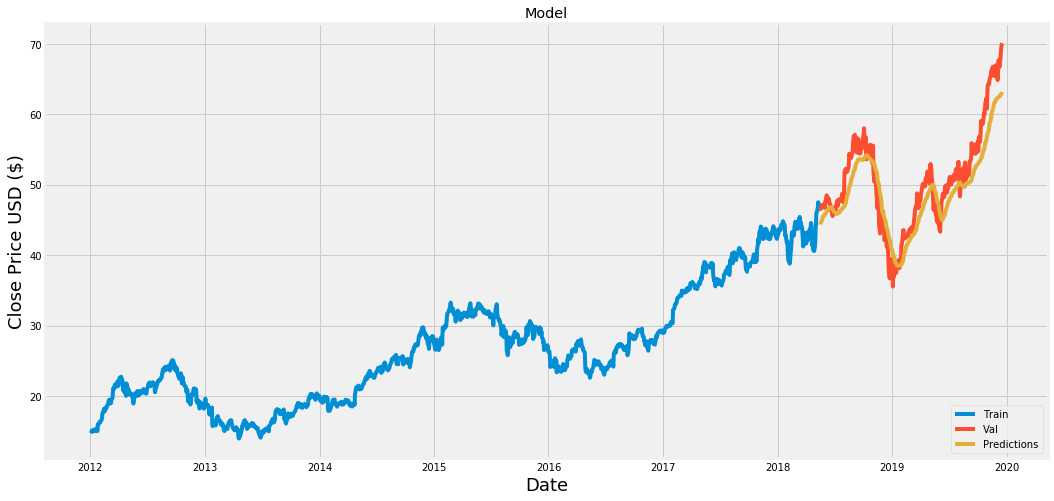

(400, 2)

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
valid.shape

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,44.345421
2018-05-18,46.577499,44.592888
2018-05-21,46.907501,44.809341
2018-05-22,46.790001,45.006157
2018-05-23,47.090000,45.178898
...,...,...
2019-12-11,67.692497,62.662994
2019-12-12,67.864998,62.753242
2019-12-13,68.787498,62.856785


In [20]:
#Get the quote
apple_quote = web.DataReader('SBI', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append teh past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[14.783326]]


In [21]:
#Get the quote
apple_quote2 = web.DataReader('SBI', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    9.16
2019-12-18    9.14
Name: Close, dtype: float64
